<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_EDA/blob/main/Praktikum01/Tugas01EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Menghubungkan Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [81]:
# Membaca file csv menggunakan pandas
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_excel('/content/gdrive/MyDrive/Tugas01 EDA/data/Salary_Data_Tugas EDA.xlsx')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,NaN,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0


In [82]:
# Mengecek ukuran dataset (jumlah baris dan kolom)
print("Ukuran dataset (baris, kolom):", df.shape)

Ukuran dataset (baris, kolom): (6707, 6)


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 0 to 6706
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6707 non-null   int64  
 1   Gender               6707 non-null   object 
 2   Education Level      6706 non-null   object 
 3   Job Title            6706 non-null   object 
 4   Years of Experience  6705 non-null   float64
 5   Salary               6703 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 314.5+ KB


In [84]:
# Mengecek jumlah total elemen dalam dataset
print("Jumlah total elemen:", df.size)

Jumlah total elemen: 40242


In [85]:
# Mengecek tipe data dari setiap kolom dalam DataFrame
print("\nTipe data setiap kolom dalam DataFrame:")
print(df.dtypes)


Tipe data setiap kolom dalam DataFrame:
Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [86]:
# Cek missing values
# Tampilkan jumlah nilai yang hilang di setiap kolom sebelum penanganan
print("Jumlah nilai yang hilang di setiap kolom sebelum penanganan:")
print(df.isnull().sum())

# Penanganan Missing Values
# Untuk kolom 'Education Level' dan 'Job Title' (kategorikal), isi dengan modus (mode)
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])
df['Job Title'] = df['Job Title'].fillna(df['Job Title'].mode()[0])

# Untuk kolom 'Years_of_Experience' dan 'Salary' (numerik), isi dengan median
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

# Verifikasi bahwa tidak ada lagi nilai yang hilang
print("\nJumlah nilai yang hilang di setiap kolom setelah penanganan:")
print(df.isnull().sum())

print("\nUkuran dataset setelah penanganan missing value:", df.shape)

Jumlah nilai yang hilang di setiap kolom sebelum penanganan:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64

Jumlah nilai yang hilang di setiap kolom setelah penanganan:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Ukuran dataset setelah penanganan missing value: (6707, 6)


In [87]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, tampilkan beberapa baris duplikat pertama
if duplicate_rows_count > 0:
    print("\nBeberapa baris duplikat pertama:")
    display(df[df.duplicated(keep=False)].head())

Jumlah baris duplikat: 4913

Beberapa baris duplikat pertama:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
140,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
194,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
208,30,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0


In [88]:
# Hapus baris duplikat
df = df.drop_duplicates()
print(f"Jumlah data duplikat setelah dihapus: {df.duplicated().sum()}")
print("Ukuran dataset setelah menghapus duplikat:", df.shape)

Jumlah data duplikat setelah dihapus: 0
Ukuran dataset setelah menghapus duplikat: (1794, 6)


In [89]:
# Rename nama kolom/standadisasi kolom
df.rename(columns={'Years of Experience': 'Years_of_Experience',
                   'Salary': 'salary'},
          inplace=True)

In [90]:
print("Top 5 rows based on highest salary:")
display(df.nlargest(5, 'salary'))

Top 5 rows based on highest salary:


,Age,Gender,Education Level,Job Title,Years_of_Experience,salary
6706,60,Female,PhD,CEO,35.0,1000000.0
30,50,Male,Bachelor's,CEO,25.0,250000.0
83,52,Male,PhD,Chief Technology Officer,24.0,250000.0
4999,45,Male,Bachelor's Degree,Financial Manager,21.0,250000.0
4274,51,Male,PhD,Data Scientist,24.0,240000.0


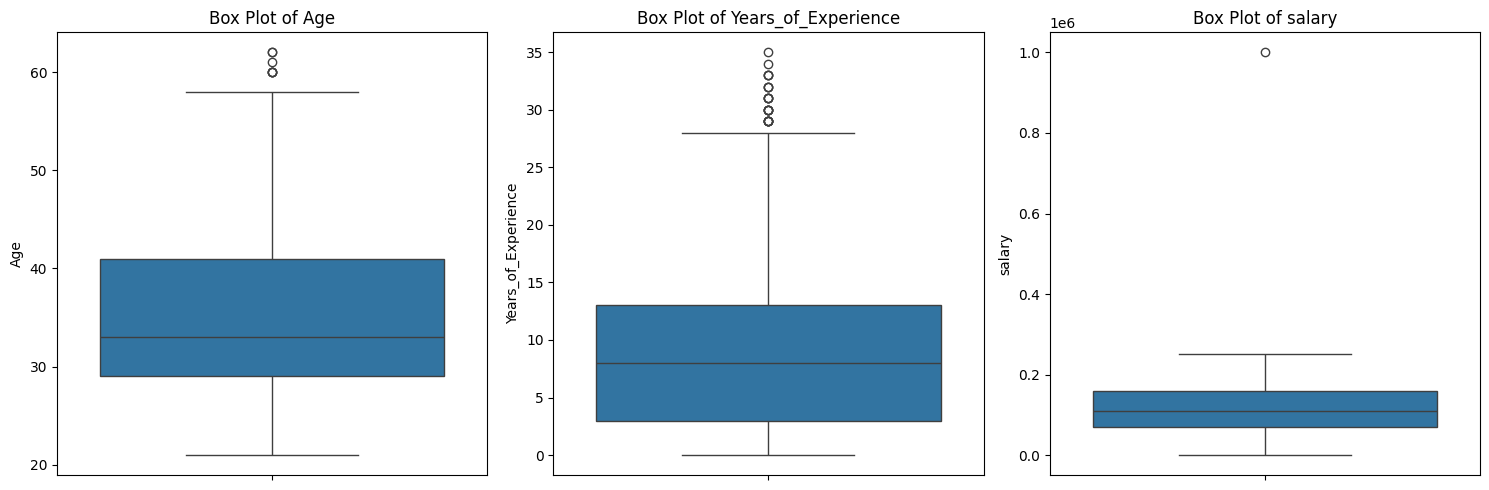

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi kolom numerik untuk mendeteksi outlier (Box Plot)
numerical_cols_outliers = ['Age', 'Years_of_Experience', 'salary']
plt.figure(figsize=(15, 5)) # Adjusted figure size to accommodate 3 plots horizontally
for i, col in enumerate(numerical_cols_outliers):
    plt.subplot(1, 3, i + 1) # Changed ncols from 2 to 3
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Jumlah baris sebelum menghapus outlier salary: 1794
Jumlah baris setelah menghapus outlier salary: 1793


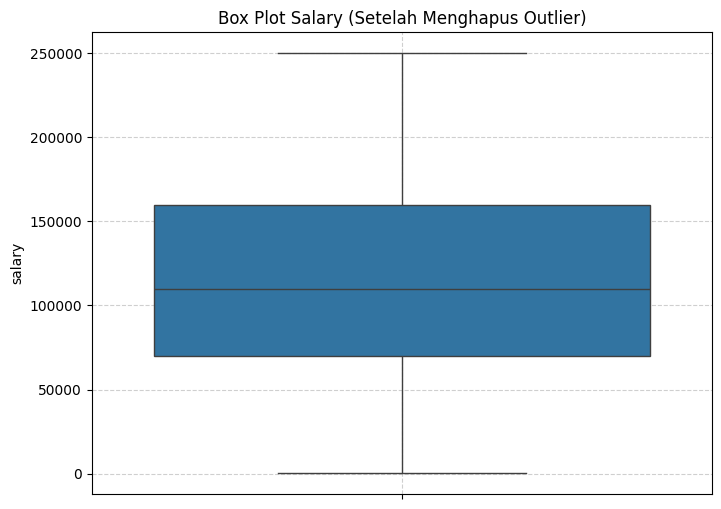

In [92]:
# Menangani outlier
# Menghitung IQR untuk kolom 'salary'
Q1_salary = df['salary'].quantile(0.25)
Q3_salary = df['salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

# Tentukan batas atas dan bawah
lower_bound_salary = Q1_salary - (1.5 * IQR_salary)
upper_bound_salary = Q3_salary + (1.5 * IQR_salary)

# Filter data (menyimpan data yang TIDAK outlier)
df_cleaned = df[(df['salary'] >= lower_bound_salary) & (df['salary'] <= upper_bound_salary)]

print(f"Jumlah baris sebelum menghapus outlier salary: {df.shape[0]}")
print(f"Jumlah baris setelah menghapus outlier salary: {df_cleaned.shape[0]}")

# Buat boxplot lagi untuk melihat hasilnya
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned['salary'])
plt.title('Box Plot Salary (Setelah Menghapus Outlier)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

df = df_cleaned

In [93]:
# Identifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: Gender
Gender
Male      971
Female    815
Other       7
Name: count, dtype: int64

Kolom: Education Level
Education Level
Bachelor's Degree    509
Master's Degree      447
PhD                  341
Bachelor's           263
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Kolom: Job Title
Job Title
Software Engineer Manager    127
Full Stack Engineer          123
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Developer                      1
Social M                       1
Social Media Man               1
Delivery Driver                1
Intern                         1
Name: count, Length: 194, dtype: int64


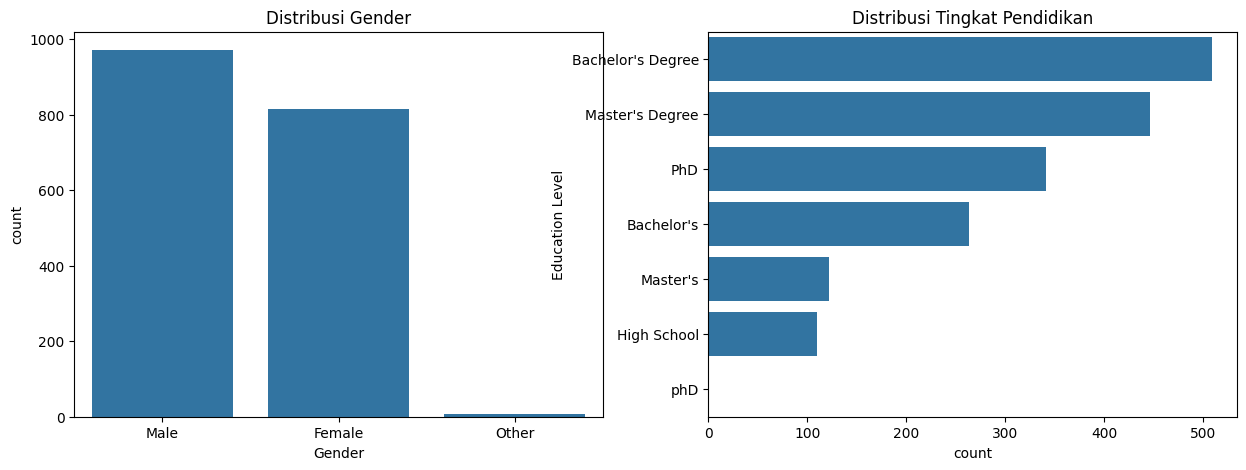

In [94]:
# Visualisasi
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index)
plt.title('Distribusi Gender')

plt.subplot(1, 2, 2)
sns.countplot(data=df, y='Education Level', order=df['Education Level'].value_counts().index)
plt.title('Distribusi Tingkat Pendidikan')
plt.show()

Job Title
Software Engineer Manager    127
Full Stack Engineer          123
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
Data Scientist                80
Software Engineer             79
Front end Developer           71
Marketing Manager             55
Product Manager               53
Name: count, dtype: int64


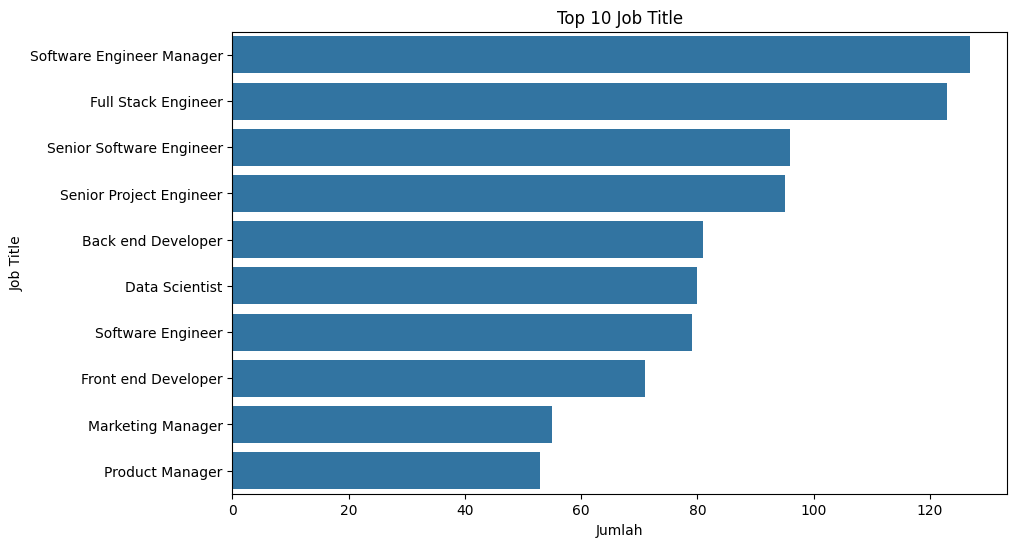

In [95]:
# Analisis Kolom Job Title (Ambil Top 10)
top_10_jobs = df['Job Title'].value_counts().nlargest(10)
print(top_10_jobs)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_jobs.index, x=top_10_jobs.values)
plt.title('Top 10 Job Title')
plt.xlabel('Jumlah')
plt.show()

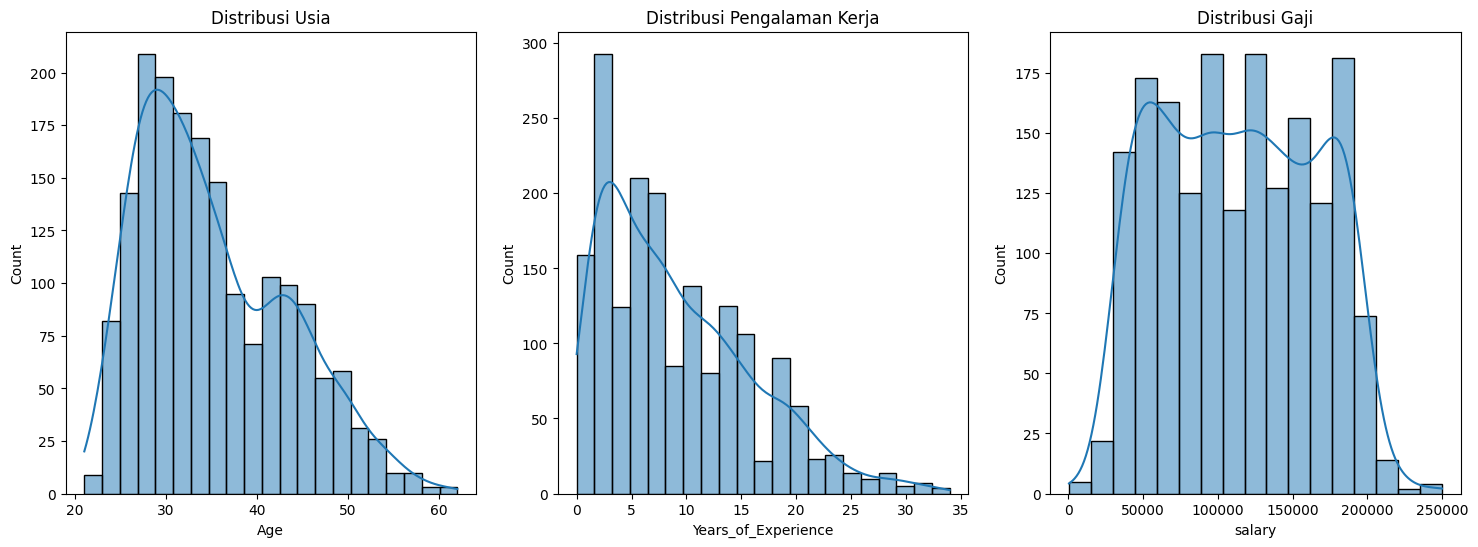

In [96]:
# Analisis Distribusi Kolom Numerikal (Age, salary, Years of Experience)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Usia')

plt.subplot(1, 3, 2)
sns.histplot(df['Years_of_Experience'], kde=True)
plt.title('Distribusi Pengalaman Kerja')

plt.subplot(1, 3, 3)
sns.histplot(df['salary'], kde=True)
plt.title('Distribusi Gaji')

plt.show()

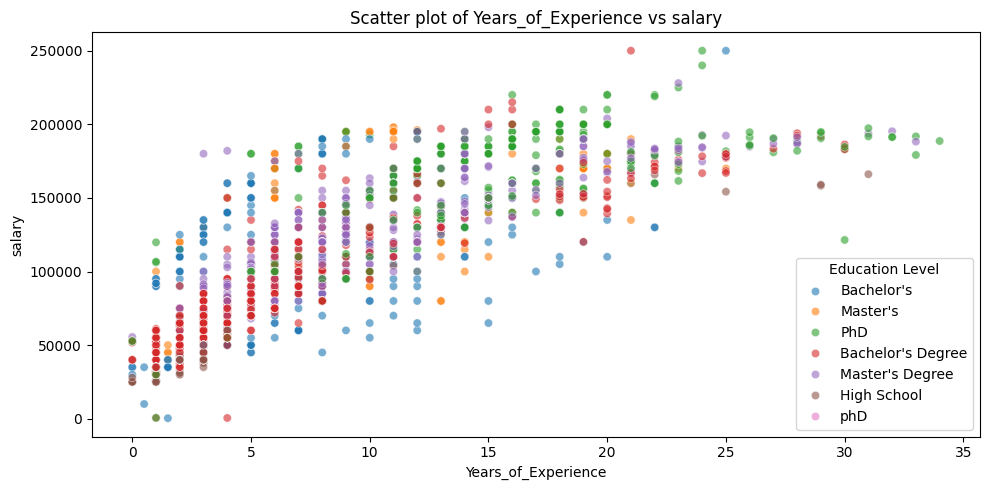

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh Visualisasi hubungan antar dua kolom numerik (Scatter Plot)
# Kita bisa memilih kolom yang relevan, misalnya CGPA vs Academic Pressure, diwarnai berdasarkan 'Depression"
numerical_cols_scatter = ['Years_of_Experience', 'salary' ]
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=numerical_cols_scatter[0], y=numerical_cols_scatter[1], hue='Education Level', alpha=0.6)
plt.title(f'Scatter plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()

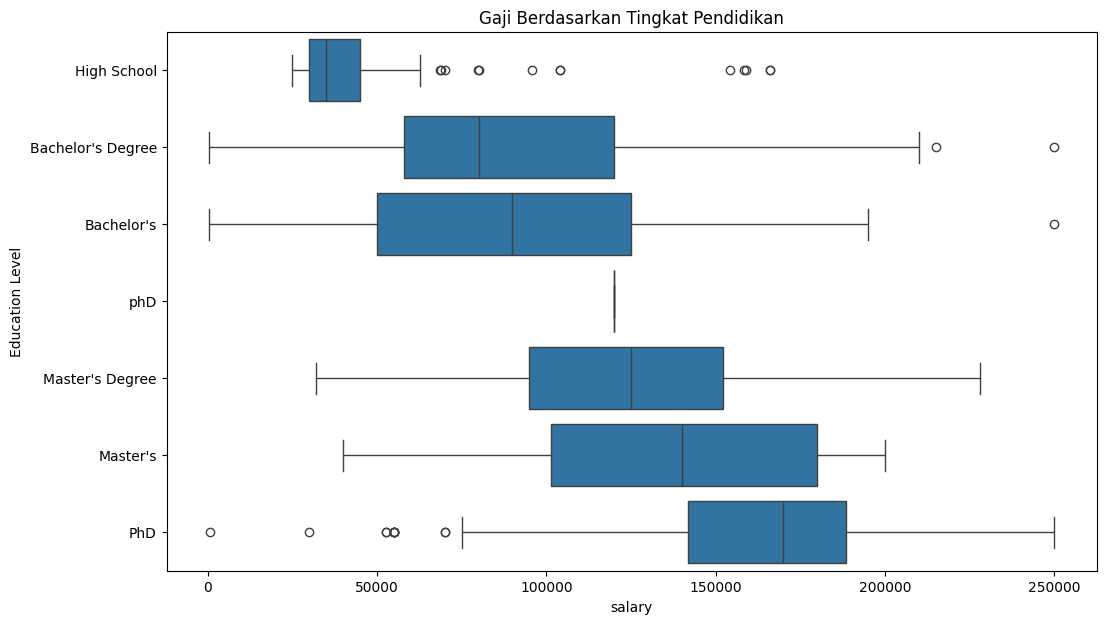

In [98]:
# Hubungan Gaji vs Tingkat Pendidikan
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='salary', y='Education Level', order=df.groupby('Education Level')['salary'].median().sort_values().index)
plt.title('Gaji Berdasarkan Tingkat Pendidikan')
plt.show()

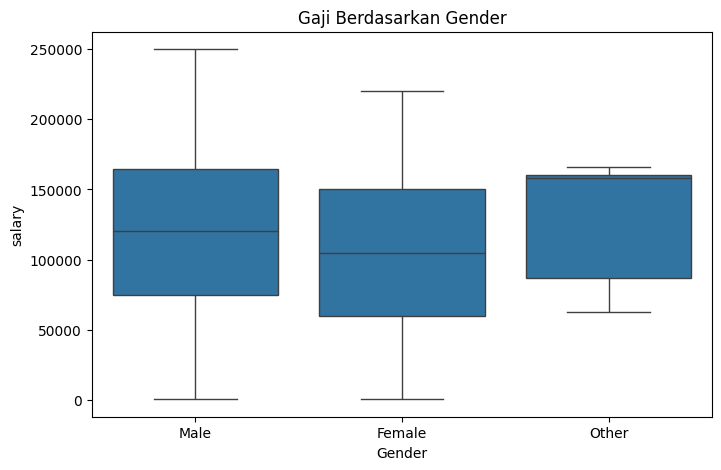

In [99]:
# Hubungan Gaji vs Gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='salary')
plt.title('Gaji Berdasarkan Gender')
plt.show()

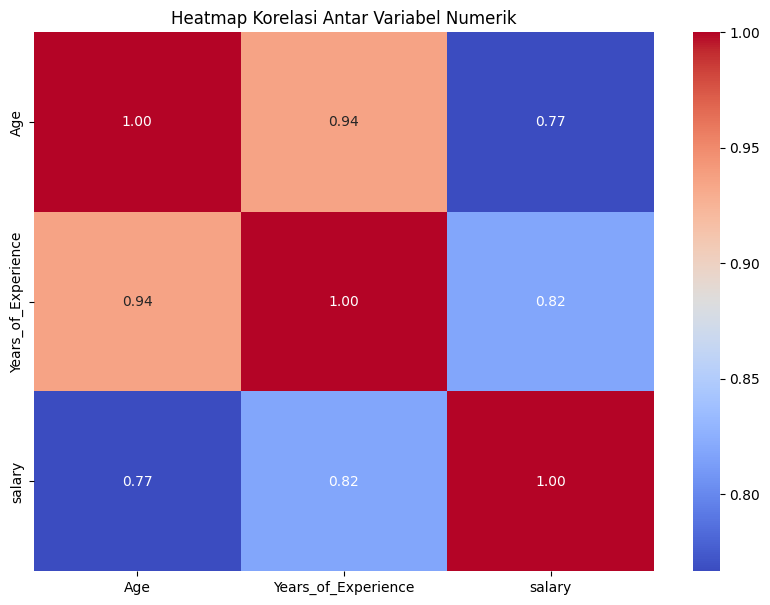

In [100]:
# Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
correlation_matrix = numerical_cols.corr()

# Tampilkan heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()


In [101]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung statistik deskriptif, median, modus, simpangan rata-rata, range, dan variansi
descriptive_stats = numerical_df.describe()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x: (x - x.mean()).abs().mean())
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var()

descriptive_stats.loc['median' ] = median_values
descriptive_stats.loc['mode'] = mode_values
descriptive_stats.loc['mad'] = mad_values
descriptive_stats.loc['range'] = range_values
descriptive_stats.loc['variance'] = variance_values

print("Ringkasan Statistik Deskriptif:")
display(descriptive_stats)

Ringkasan Statistik Deskriptif:


,Age,Years_of_Experience,salary
count,1793.000000,1793.000000,1.793000e+03
mean,35.126603,9.145287,1.131768e+05
std,8.214149,6.837536,5.155775e+04
min,21.000000,0.000000,3.500000e+02
25%,29.000000,3.000000,7.000000e+04
50%,33.000000,8.000000,1.100000e+05
75%,41.000000,13.000000,1.600000e+05
max,62.000000,34.000000,2.500000e+05
median,33.000000,8.000000,1.100000e+05
mode,29.000000,2.000000,1.200000e+05


In [102]:
# Menampilkan korlasi antara Usia dan Pendapatan
correlation = df['Age'].corr(df['salary' ])
print(f"Korelasi antara Years of Experience dan Salary: {correlation}")

Korelasi antara Years of Experience dan Salary: 0.766636687403836


In [103]:
# Hitung koefisien determinasi (R-squared)
r_squared = correlation ** 2
print(f"Koefisien determinasi (R-squared) antara Usia dan Pendapatan: {r_squared}")

Koefisien determinasi (R-squared) antara Usia dan Pendapatan: 0.5877318104735269


In [104]:
import statsmodels.formula.api as smf

# Define and fit the linear regression model
model_yearsofexperience_salary = smf.ols('salary ~ Years_of_Experience', data=df).fit()

# Mengambil koefisien dari model regresi Salary vs Years of Experience
intercept_yearsofexperience_salary = model_yearsofexperience_salary.params['Intercept']
yearsofexperience_coef_yearsofexperience_salary = model_yearsofexperience_salary.params['Years_of_Experience']

# Mengambil Jumlah Kuadrat Residual (SSR) dari model baru
ssr_yearsofexperience_salary = model_yearsofexperience_salary.ssr

print(f"Jumlah Kuadrat Residual (SSR) untuk model Salary vs Years Of Experience: {ssr_yearsofexperience_salary:.4f}")
print("Persamaan Garis Regresi (Salary vs Years Of Experience):")
print(f"Salary_prediksi = ({intercept_yearsofexperience_salary:.4f}) + (({yearsofexperience_coef_yearsofexperience_salary:.4f}) * Years_of_Experience)")

Jumlah Kuadrat Residual (SSR) untuk model Salary vs Years Of Experience: 1575234782903.7053
Persamaan Garis Regresi (Salary vs Years Of Experience):
Salary_prediksi = (56760.3372) + ((6168.9100) * Years_of_Experience)


In [105]:
x = df['Years_of_Experience']
y = df['salary']

# Menghitung total x, total y, total x^2, total y^2
total_x = x.sum()
total_y = y.sum()
total_x2 = (x**2).sum()
total_y2 = (y**2).sum()
banyak_data = len(df)

# Menghitung SS xy, SS xx, SS yy
ss_xy = (x * y).sum() - (total_x * total_y) / banyak_data
ss_xx = (x**2).sum() - (total_x**2) / banyak_data
ss_yy = (y**2).sum() - (total_y**2) / banyak_data

# Menghitung koefisien korelasi (r)
import numpy as np
r = ss_xy / np.sqrt(ss_xx * ss_yy)

# Menghitung koefisien determinasi (r^2)
r_squared = r**2

print(f"Total Years of Experience (x): {total_x:.2f}")
print(f"Total Salary (y): {total_y:.2f}")
print(f"Total x^2: {total_x2:.2f}")
print(f"Total y^2: {total_y2:.2f}")
print(f"Banyak Data: {banyak_data}")
print(f"SS xy: {ss_xy:.2f}")
print(f"SS xx: {ss_xx:.2f}")
print(f"SS yy: {ss_yy:.2f}")
print(f"Koefisien Korelasi (r): {r:.4f}")
print(f"Koefisien Determinasi (r^2): {r_squared:.4f}")

Total Years of Experience (x): 16397.50
Total Salary (y): 202925987.00
Total x^2: 233739.25
Total y^2: 27730009852093.00
Banyak Data: 1793
SS xy: 516827598.84
SS xx: 83779.40
SS yy: 4763497749513.99
Koefisien Korelasi (r): 0.8181
Koefisien Determinasi (r^2): 0.6693


Kesimpulan


1. Pembersihan Data: Dataset awal memiliki 6707 baris dan 6 kolom, dengan beberapa nilai yang hilang di kolom 'Education Level', 'Job Title', 'Years of Experience', dan 'Salary'. Nilai yang hilang telah ditangani dengan mengisi modus untuk kolom kategorikal dan median untuk kolom numerik. Selain itu, terdapat 4913 duplikat yang berhasil dihapus, mengurangi jumlah baris menjadi 1794. Nama kolom juga distandarisasi ('Years of Experience' menjadi 'Years_of_Experience', 'Salary' menjadi 'salary').
2. Penanganan Outlier: Outlier pada kolom 'salary' terdeteksi dan berhasil dihapus menggunakan metode IQR, menghasilkan dataset akhir dengan 1793 baris.
3. Distribusi Data Kategorikal:
    - Gender: Distribusi gender menunjukkan dominasi Male (971) dan Female (815), dengan sebagian kecil 'Other' (7).
    - Education Level: Terdapat beberapa inkonsistensi penulisan (misalnya, 'Bachelor's Degree' dan 'Bachelor's', 'Master's Degree' dan 'Master's', 'PhD' dan 'phD'), namun secara umum 'Bachelor's Degree' dan 'Master's Degree' adalah tingkat pendidikan yang paling umum.
    - Job Title: 'Software Engineer Manager' dan 'Full Stack Engineer' adalah beberapa pekerjaan yang paling sering muncul dalam dataset.
4. Distribusi Data Numerik: Kolom 'Age', 'Years_of_Experience', dan 'salary' menunjukkan distribusi yang bervariasi, dengan histogram yang memberikan gambaran tentang sebaran data.
5. Hubungan Antar Variabel:
    - Korelasi: Ditemukan korelasi positif yang kuat antara 'Age', 'Years_of_Experience', dan 'salary'. Secara khusus, korelasi antara 'Years_of_Experience' dan 'salary' adalah 0.8181, dan antara 'Age' dan 'salary' adalah 0.7666.
    - oefisien Determinasi (R-squared): Nilai R-squared untuk hubungan antara 'Years_of_Experience' dan 'salary' adalah 0.6693, yang berarti sekitar 66.93% variasi pada gaji dapat dijelaskan oleh 'Years_of_Experience'.
    - Regresi Linier: Model regresi linier sederhana salary ~ Years_of_Experience menghasilkan persamaan Salary_prediksi = 56760.3372 + (6168.9100 * Years_of_Experience). Ini menunjukkan bahwa setiap penambahan satu tahun pengalaman diperkirakan meningkatkan gaji sekitar 6168.91.
    - Pengaruh Tingkat Pendidikan dan Gender: Visualisasi box plot menunjukkan bahwa tingkat pendidikan yang lebih tinggi cenderung berkorelasi dengan gaji yang lebih tinggi. Distribusi gaji berdasarkan gender juga terlihat, meskipun perbedaannya perlu analisis lebih lanjut.
Secara keseluruhan, analisis ini menggarisbawahi bahwa 'Years_of_Experience' adalah prediktor yang sangat signifikan untuk 'salary', dengan 'Age' dan'Education Level' juga memiliki pengaruh yang kuat terhadap gaji.





